In [ ]:
import tensorflow as tf 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
bostonDF.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

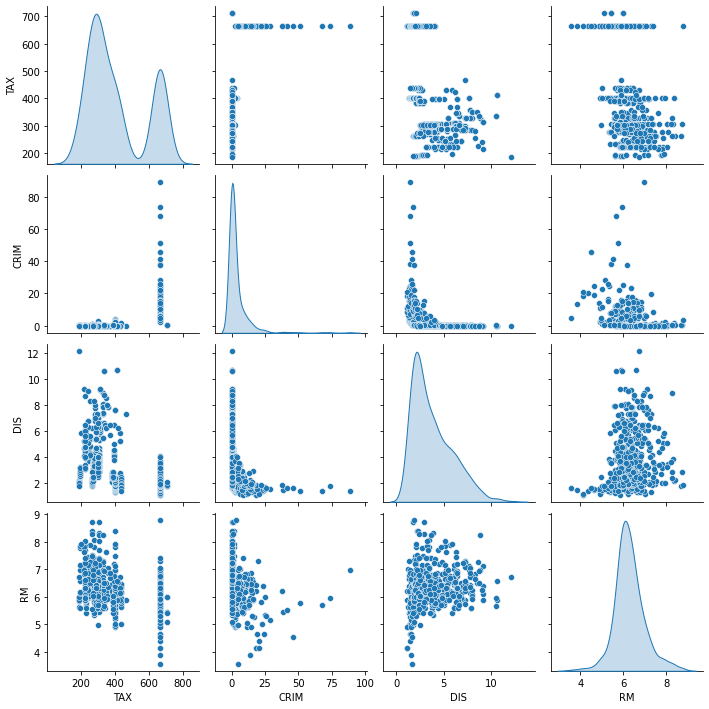

In [ ]:
sns.pairplot(bostonDF[['TAX', 'CRIM', 'DIS', 'RM']], diag_kind='kde')

In [ ]:
X = bostonDF.drop("RM", axis = 1)
y = bostonDF["RM"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Set random Seed 
tf.random.set_seed(42)

# 1. Build our model 
boston_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile our model 
boston_model.compile(loss = tf.keras.losses.mae,
                     optimizer = tf.keras.optimizers.Adam(0.001),
                     metrics =["mae"])

# 3. Fit the model 
history = boston_model.fit(X_train, y_train, epochs=100, verbose = 1)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 172.9759 - mae: 172.9759
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 118.1121 - mae: 118.1121
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 71.8027 - mae: 71.8027
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 47.6342 - mae: 47.6342
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 40.5114 - mae: 40.5114
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 35.4742 - mae: 35.4742
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 29.8251 - mae: 29.8251
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 23.9686 - mae: 23.9686
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 18.5054 - mae: 18.5054
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 13.5914 - mae: 13.5914
Epoch 11/100
13/13 [===============

In [ ]:
# Check the results of our boston model using the test data
boston_model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 1.1979 - mae: 1.1979


[1.1979457139968872, 1.1979457139968872]

Text(0.5, 0, 'epochs')

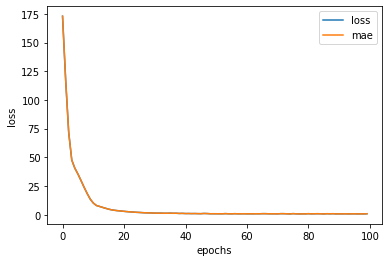

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Making predictions 
y_preds = boston_model.predict(X_test)

In [ ]:
y_preds

array([[7.131075 ],
       [8.108263 ],
       [8.066048 ],
       [6.7950926],
       [7.6261973],
       [7.2554574],
       [6.8915114],
       [7.371438 ],
       [7.824529 ],
       [7.4503016],
       [6.8579397],
       [6.560222 ],
       [5.2034335],
       [6.9931526],
       [7.4612484],
       [7.560176 ],
       [6.7942476],
       [6.7050953],
       [7.8705   ],
       [7.677104 ],
       [7.062572 ],
       [7.4344335],
       [7.306373 ],
       [7.8794904],
       [7.5640235],
       [7.3988757],
       [6.9886556],
       [6.3605356],
       [7.446695 ],
       [7.344301 ],
       [6.807171 ],
       [7.472486 ],
       [7.877134 ],
       [8.212007 ],
       [7.122644 ],
       [6.2168326],
       [7.3652043],
       [7.292069 ],
       [7.1236653],
       [6.5892386],
       [6.8889856],
       [7.9333735],
       [8.11588  ],
       [7.07132  ],
       [7.1948133],
       [7.7100835],
       [7.5978117],
       [6.6726265],
       [7.5319514],
       [7.3875194],


In [ ]:
boston_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
boston_model.save("Best_model_SavedModel_format")

INFO:tensorflow:Assets written to: Best_model_SavedModel_format/assets


In [ ]:
mae = tf.metrics.mean_absolute_error(y_true= y_test, 
                                     y_pred= y_preds)

mae

<tf.Tensor: shape=(102,), dtype=float32, numpy=
array([1.0302706 , 1.9474298 , 1.9052143 , 0.74976873, 1.4826858 ,
       1.139089  , 0.8268231 , 1.2448449 , 1.669351  , 1.3175231 ,
       0.7992358 , 0.594622  , 1.0239325 , 0.9112787 , 1.3276113 ,
       1.420548  , 0.749106  , 0.6845636 , 1.712961  , 1.5305979 ,
       0.97117   , 1.3028995 , 1.185013  , 1.7216867 , 1.4241691 ,
       1.2701305 , 0.9073989 , 0.5071478 , 1.3141992 , 1.2198365 ,
       0.7592418 , 1.3380163 , 1.7193763 , 2.0511732 , 1.0229967 ,
       0.47629082, 1.2391001 , 1.1721112 , 1.0238779 , 0.61103255,
       0.8247431 , 1.7745131 , 1.9550467 , 0.97871727, 1.0854528 ,
       1.5616374 , 1.4559698 , 0.6634741 , 1.3939837 , 1.2596649 ,
       0.75748676, 0.62115544, 1.5027417 , 2.015952  , 0.6196915 ,
       1.3330687 , 1.6782392 , 2.6548007 , 0.89576024, 1.2130727 ,
       1.5542414 , 2.428896  , 0.6500478 , 0.91907054, 2.4516423 ,
       1.0624963 , 1.559406  , 1.4540037 , 2.276972  , 0.48813355,
       0.47980

In [ ]:
y_test.shape, y_preds.shape

((102,), (102, 1))

In [ ]:
y_preds.squeeze().shape

(102,)

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred= y_preds.squeeze())

mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.1979448>

In [ ]:
# Similarly squeeze y_preds to try the mse

mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = y_preds.squeeze())

mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.9329466>